<a href="https://colab.research.google.com/github/kushv16/Audio-Sentiment-Analysis/blob/master/Merging_of_different_datasets_and_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install noisereduce

import pandas as pd
import numpy as np
import random
from glob import glob
import os
import librosa
import noisereduce as nr

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path = "/content/drive/MyDrive/LY Project/Dataframes/Features/Final/"
ravdess = pd.read_csv(path + "DF_FINAL_RAVDESS.csv")
crema = pd.read_csv(path+ "DF_FINAL_CREMA.csv")
savee = pd.read_csv(path + "DF_FINAL_SAVEE.csv")
tess = pd.read_csv(path + "FINAL_TESS_FEATURES.csv", index_col = 0)
jl = pd.read_csv(path + "FINAL_DF_JLCORPUS.csv", index_col = 0)
emo = pd.read_csv(path + "FINAL_EMO_FEATURES.csv")

In [ ]:
ravdess.shape, crema.shape, savee.shape, tess.shape, jl.shape, emo.shape

((1248, 97), (7442, 97), (480, 97), (2800, 97), (2400, 97), (6893, 97))

In [ ]:
concat_df = pd.concat([ravdess, crema, savee, tess, jl, emo])

In [ ]:
print(concat_df.shape)

concat_df.head()

(21263, 97)


,path,filename,dataset,duration,sample_rate,gender,age,emotion,f0_mean,f0_median,...,mfcc21_var,mfcc22_var,mfcc23_var,mfcc24_var,mfcc25_var,mfcc26_var,mfcc27_var,mfcc28_var,mfcc29_var,mfcc30_var
0,ravdess-emotional-speech-audio/Actor_01/03-01-...,03-01-01-01-01-01-01,RAVDESS,3.303,48000,male,26,neutral,112.335199,109.684328,...,29.315643,36.579422,28.419561,20.604578,34.236244,17.831990,47.886536,34.304970,32.610954,25.258045
1,ravdess-emotional-speech-audio/Actor_01/03-01-...,03-01-01-01-01-02-01,RAVDESS,3.337,48000,male,26,neutral,117.048401,114.869835,...,39.815510,44.388800,35.062126,16.261528,26.367765,17.877956,39.467236,34.620537,38.908985,23.834513
2,ravdess-emotional-speech-audio/Actor_01/03-01-...,03-01-01-01-02-01-01,RAVDESS,3.270,48000,male,26,neutral,113.449176,109.050773,...,22.035300,37.271484,41.312490,37.438225,32.081330,30.129055,40.721256,23.911890,8.379778,28.543652
3,ravdess-emotional-speech-audio/Actor_01/03-01-...,03-01-01-01-02-02-01,RAVDESS,3.170,48000,male,26,neutral,112.750895,112.896440,...,31.971504,36.978264,18.796390,35.866673,42.234043,26.264517,42.082623,24.384457,41.745533,36.165436
4,ravdess-emotional-speech-audio/Actor_01/03-01-...,03-01-03-01-01-01-01,RAVDESS,3.470,48000,male,26,happy,149.054000,144.729338,...,61.203896,63.172386,35.944280,25.528050,28.051268,22.667345,10.932018,16.455738,23.799614,19.917862


In [ ]:
r = ravdess['emotion'].unique()
c = crema['emotion'].unique()
s = savee['emotion'].unique()
t = tess['emotion'].unique()
e = emo['emotion'].unique()
j = jl['emotion'].unique()


r.sort()
c.sort()
t.sort()
j.sort()
e.sort()
s.sort()

print(r)
print(c)
print(t)
print(s)
print(e)
print(j)

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad']
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
['amused' 'angry' 'disgust' 'neutral' 'sleepy']
['angry' 'anxious' 'apologetic' 'assertive' 'concerned' 'encouraging'
 'excited' 'happy' 'neutral' 'sad']


In [ ]:
print(concat_df['emotion'].unique())

['neutral' 'happy' 'sad' 'angry' 'fear' 'disgust' 'surprise' 'anxious'
 'apologetic' 'assertive' 'concerned' 'encouraging' 'excited' 'amused'
 'sleepy']


In [ ]:
drop_emotions = concat_df[concat_df['emotion'].str.contains('amused|calm|sleepy|assertive|concerned|encouraging|anxious|apologetic|excited') == False].reset_index(drop=True)

In [ ]:
c_emo = drop_emotions[drop_emotions['dataset'] == 'CREMA-D']

In [ ]:
drop_emotions.isna().sum()

path           0
filename       0
dataset        0
duration       0
sample_rate    0
              ..
mfcc26_var     0
mfcc27_var     0
mfcc28_var     0
mfcc29_var     0
mfcc30_var     0
Length: 97, dtype: int64

In [ ]:
drop_emotions.to_csv("/content/drive/MyDrive/LY Project/combo.csv", index=False)

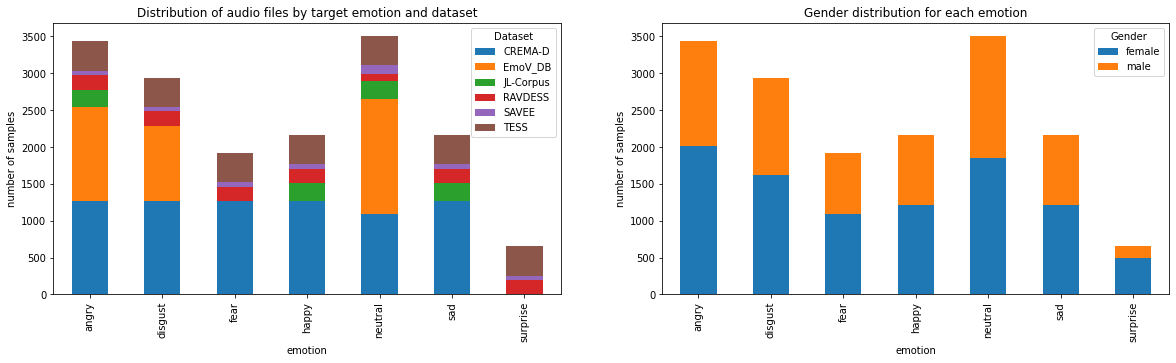

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

drop_emotions.groupby(['emotion', 'dataset']).size().unstack().plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Distribution of audio files by target emotion and dataset')
axes[0].set_ylabel('number of samples')
axes[0].legend(title='Dataset')

drop_emotions.groupby(['emotion', 'gender']).size().unstack().plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Gender distribution for each emotion')
axes[1].set_ylabel('number of samples')
axes[1].legend(title='Gender')

plt.savefig('/content/drive/MyDrive/LY Project/Images/my_plot.png')
plt.show()

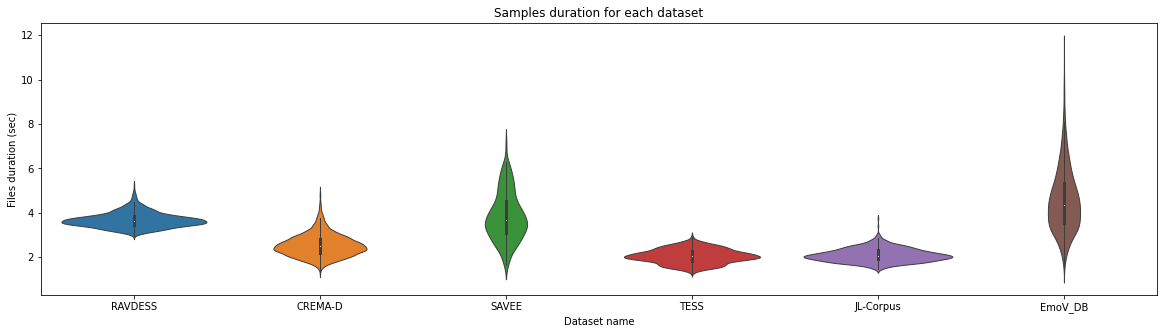

In [ ]:
import seaborn as sns

# Check duration distribution by each source using violin plots
plt.figure(figsize=(20,5))
sns.violinplot(x=drop_emotions['dataset'],y=drop_emotions['duration'], linewidth=1)
plt.xlabel('Dataset name')
plt.ylabel('Files duration (sec)')
plt.title('Samples duration for each dataset', size=12)
plt.savefig('/content/drive/MyDrive/LY Project/Images/my_plot1.png')
plt.show()

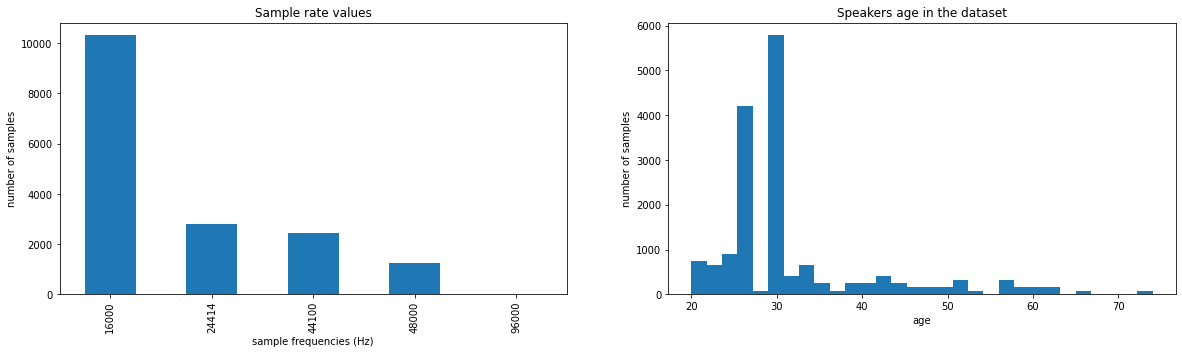

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for c in ["sample_rate"]:
    drop_emotions[c].value_counts().plot.bar(ax=axes[0])
axes[0].set_title('Sample rate values')
axes[0].set_xlabel('sample frequencies (Hz)')
axes[0].set_ylabel('number of samples')
    
plt.title('Speakers age in the dataset')
drop_emotions['age'].hist(bins=30, grid=False, ax=axes[1])
axes[1].set_xlabel('age')
axes[1].set_ylabel('number of samples')
plt.savefig('/content/drive/MyDrive/LY Project/Images/my_plot2.png')
plt.show()